In [3]:
import numpy as np 
from scipy.constants.constants import C2K, K2C
import math
from scipy import optimize as opt # for optimization
import matplotlib.pyplot as plt
from matplotlib import cm
from flow_stress.flow_stress import *

In [1]:
#testing testing testing
temp = range(300, 600)
pressure = [400]
grain_size = range(3, 35, 3)#range(5,10)#[10,12,13,16,27,29]##[5,6,7,8,9,10,11,12,13,14,15,30] #List of grainsizes 
width = [30]

In [2]:
temperature= 790
pressure = 550000000

In [11]:
calculate_coefficient_table(temperature)
print CS

#Optimizing equation to solve for volume
def fugacity_optimizer(temperature,pressure):

    def fun(v):
        return eos(temperature, v)- pressure
    volume = opt.brentq(fun, 5, 30) #Volume in cc/mo

    #Calculate fugacity 
    fugacity = PSfug(pressure, temperature, volume)
    
    return fugacity

fugacity_optimizer(temperature, pressure)

NameError: name 'temperature' is not defined

In [33]:
fugacity_optimizer_vectorized(t,p)

array([ 166.83294563,  191.98215191,  225.295237  ,  261.8241432 ])

In [6]:
t

array([ 723.15,  775.  ,  780.  ,  790.  ])

In [1]:
#from flow_stress.flow_stress import *
from flow_stress.fugacity_calculator import *

t = np.array([723.15, 775, 780, 790])
p = np.array([400000000, 450000000, 500000000, 550000000])
CS = np.empty((4,10))
f = np.empty((len(t), len(t)))

def fugacity_optimizer_arrays(temperature, pressure):
    for num, t in enumerate(temperature):
        for p in pressure:
        #print t
            #c = calculate_coefficient_table(t)
            #CS[num] = c
            #fug = fugacity_optimizer(t,p)
            #f[num] = fug
        #print c
        #for p in pressure:
            #fug = fugacity_optimizer(t,p)
            #f[num] = fug
            

#result_array = fugacity_optimizer_vectorized(T, P)
#print(result_array)

fugacity_optimizer_arrays(t,p)
print(CS)
print(f)

NameError: global name 'calculate_coefficient_table' is not defined

[[ 166.83294563  162.26045226  161.88411029  161.16160069]
 [ 199.22058476  191.98215191  191.37804672  190.21356113]
 [ 236.85165778  226.19048201  225.295237    223.56638182]
 [ 280.52380592  265.52646358  264.26402929  261.8241432 ]]


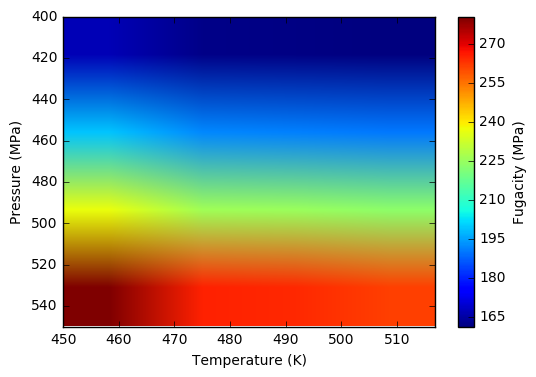

In [4]:
t = np.array([723.15, 775, 780, 790])
tC = K2C(t)
p = np.array([400000000, 450000000, 500000000, 550000000])
T, P = np.meshgrid(t,p)


fugacity_optimizer_vectorized = np.vectorize(fugacity_optimizer)
CS_vectorized = np.vectorize(calculate_coefficient_table)

#CS_vectorized(T)#This is not quite right
result_array = fugacity_optimizer_vectorized(T,P)
print(result_array)

im = plt.imshow(result_array, cmap=plt.cm.jet, aspect="auto",extent=[min(tC),max(tC),550, 400])#interpolation="none",
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (MPa)')
plt.colorbar(im, label='Fugacity (MPa)')
plt.show()

In [47]:
A = np.ones([2, 10])
print(A)

def f(x):
    return x * x + 3 * x - 2 if x > 0 else x * 5 + 8

fv = np.vectorize(f, otypes=[np.float])  



result_array = fv(A)
print(result_array)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]


In [41]:
np.array([10, 20, 30, 40, 50],[10, 20, 30, 40, 50])

TypeError: data type not understood

In [6]:
CS = np.zeros([10])

import numpy as np
temp = range(400, 402)
temp = C2K(temp)
press = [400000000, 410000000]
fug = []
for t in temp:
    for p in press:
        cs = calculate_coefficient_table(t)
        fu = fugacity_optimizer(t,p)
        fug.append(fu)

print(fug)

[86.11912549447844, 89.26649890835894, 86.69906427970614, 89.86527649018399]


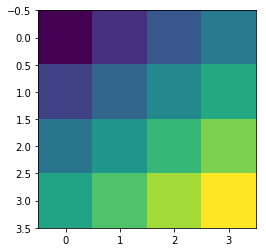

array([[  2.29260000e+11,   2.30060000e+11,   2.30860000e+11,
          2.31660000e+11],
       [  2.30406300e+11,   2.31210300e+11,   2.32014300e+11,
          2.32818300e+11],
       [  2.31552600e+11,   2.32360600e+11,   2.33168600e+11,
          2.33976600e+11],
       [  2.32698900e+11,   2.33510900e+11,   2.34322900e+11,
          2.35134900e+11]])

In [40]:
t = np.linspace(300, 306, 4, dtype=int)
t = C2K(t)
p = np.linspace(400, 406, 4, dtype=int)
p = p*1.0E6

def mesh_fun(xx, yy):
    zz = xx*yy
    return zz 

tt, pp = np.meshgrid(t, p)

zz = mesh_fun(tt, pp)

plt.imshow(zz)
plt.show()
zz

116.6204752272425

116.6204752272425